In [21]:
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
"""
Get time series for different countries on:
- GDP
- CO2 emmissions
- Exports
- Natural resource ?
- Mean/Max/Min temperature

For a given time, cluster countries into GDP groups and regress CO2 emissions on GDP
control for exports, imports, etc.

Report standard errors
Discuss statistical significance
"""

In [1]:
# https://wits.worldbank.org/
# https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [24]:
d = pd.read_csv('data/exports/API_NE.EXP.GNFS.ZS_DS2_en_csv_v2_9950645.csv')

TypeError: scatter() missing 1 required positional argument: 'y'

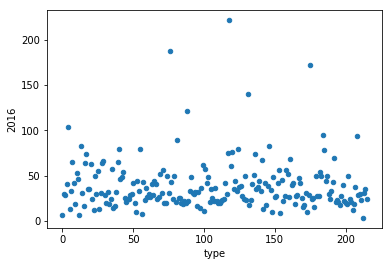

In [70]:
valid_country_data = d[['Country Name', '2016']].dropna()
valid_country_data['type'] = range(valid_country_data.count()[0])
valid_country_data.plot.scatter('type', '2016')
# x = valid_country_data['Country Name'].values
# y = valid_country_data['2016'].values
pd.DataFrame.plot.scatter(x, y)
plt.show()
# valid_country_data

In [59]:
# pd.DataFrame.plot.scatter(range(20), pd.cut(valid_country_data['2016'], bins=20).data)
# plt.show()
pd.DataFrame(pd.cut(valid_country_data['2016'], bins=20))

,2016
1,"(3.068, 14.186]"
2,"(25.085, 35.984]"
3,"(25.085, 35.984]"
5,"(35.984, 46.883]"
6,"(101.378, 112.277]"
7,"(3.068, 14.186]"
8,"(25.085, 35.984]"
9,"(57.782, 68.681]"
10,"(35.984, 46.883]"
11,"(14.186, 25.085]"


In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [12]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [19]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


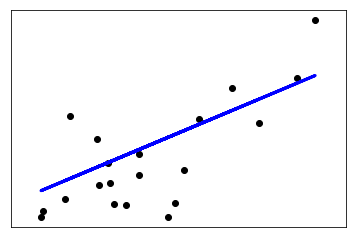

In [22]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()